# Session 22 Date and Time in Pandas

In [8]:
import pandas as pd
import numpy as np
import datetime as dt

## Vectorised DateTime Operations

Date and time data is extremely common in real-world datasets such as:

* Transaction logs
* User activity timestamps
* Sensor data
* Time-series datasets

Pandas provides **vectorised DateTime operations** that allow efficient manipulation of date and time values across entire DataFrame columns.

In Pandas, DateTime functionality mainly revolves around two core objects:

* **Timestamp Object**
* **DatetimeIndex Object**

---

## Timestamp Object

A **Timestamp** represents a **single, specific moment in time**.
Example: *October 24, 2022 at 7:00 PM*

---

### Creating a Timestamp Object

```python
pd.Timestamp('2025/1/5')
```

**Output:**

```
Timestamp('2026-01-05 00:00:00')
```

**Explanation:**

* Since no time was provided, Pandas assumes the time to be **start of the day (00:00:00)**.
* Pandas internally stores timestamps with both **date and time**, even if time is not explicitly mentioned.

---

### Variations of Creating a Timestamp Object

Pandas is highly flexible in parsing date and time formats.

```python
pd.Timestamp('2026-1-5')
```

```python
pd.Timestamp('2026, 1, 5')
```

---

### Providing Only the Year

```python
pd.Timestamp('2026')
```

**Explanation:**

* Defaults to `January 1st` of the given year
* Time is set to `00:00:00`

---

### Using Natural Language Text

```python
pd.Timestamp("5th January 2026")
```

Pandas can intelligently parse many human-readable date formats.

---

### Providing Explicit Time

```python
pd.Timestamp("5th January 2026 9:21:56PM")
```

**Explanation:**

* Both date and time are explicitly captured
* Stored with second-level precision

---

### Using Python’s `datetime` Object

```python
pd.Timestamp(dt.datetime(2026, 1, 5, 9, 21, 56))
```

**Explanation:**

* Pandas can directly convert Python’s `datetime.datetime` objects
* Useful when working with standard Python libraries or APIs

---

## Key Characteristics of Timestamp Objects

* Represent **a single moment in time**
* Immutable
* Time-zone aware (if specified)
* Internally optimized for fast computation
* Used heavily in:

  * Time-series analysis
  * Indexing
  * Temporal filtering

---

## Why Timestamp Matters in Data Science

* Acts as the **building block** for time-based indexing
* Enables precise time comparisons
* Allows arithmetic operations like:

  * Adding/subtracting time
  * Comparing timestamps
* Serves as the foundation for `DatetimeIndex`

In [ ]:
# creating a timestamp object
pd.Timestamp('2026/1/5')

Timestamp('2025-01-05 00:00:00')

In [ ]:
# variations
pd.Timestamp('2026-1-5')
pd.Timestamp('2026, , 5')

Timestamp('2026-05-01 00:00:00')

In [5]:
# only year
pd.Timestamp('2026')

Timestamp('2026-01-01 00:00:00')

In [6]:
# using text
pd.Timestamp("5th January 2026")

Timestamp('2026-01-05 00:00:00')

In [7]:
# providing time
pd.Timestamp("5th January 2026 9:21:56PM")

Timestamp('2026-01-05 21:21:56')

In [9]:
# using datetime.datetime (python origin) object
pd.Timestamp(dt.datetime(2026, 1, 5, 9, 21, 56))

Timestamp('2026-01-05 09:21:56')

## Timestamp Functionalities and Benefits

### Why Did Pandas Introduce the `Timestamp` Object?

At first glance, Python’s built-in `datetime` module seems sufficient for working with dates and times. However, serious limitations appear when dealing with **large datasets**.

---

### Limitations of Python’s `datetime`

* The syntax of Python’s `datetime` is intuitive and easy to use
* Performance degrades significantly when working with large collections of datetime values
* Operations are **not vectorised**
* Comparable to using **Python lists instead of NumPy arrays**

These limitations motivated a more efficient approach.

---

### NumPy’s Contribution: `datetime64`

To overcome these issues, the NumPy team introduced native time-series data types.

Key characteristics of `datetime64`:

* Dates are encoded as **64-bit integers**
* Extremely compact memory representation
* Enables **vectorised date and time operations**
* Designed for high-performance numerical computation

---

### Example: NumPy `datetime64`

```python
date = np.array("2013-07-04", dtype=np.datetime64)
date
```

**Output:**

```
array('2013-07-04', dtype='datetime64[D]')
```

---

### Vectorised Date Arithmetic

```python
date + np.arange(12)
```

**Output:**

```
array(['2013-07-04', '2013-07-05', '2013-07-06', '2013-07-07',
       '2013-07-08', '2013-07-09', '2013-07-10', '2013-07-11',
       '2013-07-12', '2013-07-13', '2013-07-14', '2013-07-15'],
      dtype='datetime64[D]')
```

**Explanation:**

* The operation is applied element-wise without loops
* Each value in `np.arange(12)` is added to the base date
* This is significantly faster than equivalent operations using Python’s `datetime`

---

### Performance Advantage

* Uniform `datetime64` dtype allows low-level optimizations
* Vectorised operations scale efficiently with large arrays
* Much faster than operating on collections of Python `datetime` objects

---

### Pandas Timestamp: Best of Both Worlds

The **Pandas `Timestamp` object** combines:

* The **ease of use** of Python’s `datetime`
* The **efficient storage** of NumPy’s `datetime64`
* A **vectorised interface** suitable for large datasets

This makes `Timestamp` ideal for real-world data analysis and time-series processing.

---

### From Timestamp to DatetimeIndex

* A collection of `Timestamp` objects forms a **DatetimeIndex**
* `DatetimeIndex` is used to index:

  * Pandas `Series`
  * Pandas `DataFrame`
* Enables powerful time-based slicing, filtering, and resampling

---

## Information Extraction from Timestamp

One of the most useful features of the `Timestamp` object is direct access to its date and time components.

---

### Extracting Date and Time Attributes

```python
x = pd.Timestamp(dt.datetime(2026, 1, 5, 9, 21, 56))
```

```python
x.year
x.month
x.day
x.hour
x.minute
x.second
```

**Explanation:**

* Attributes are accessed directly without method calls
* Extraction is fast and intuitive
* These attributes become vectorised when used with `.dt` on Series

---

## Key Takeaway

* Python `datetime` is user-friendly but slow at scale
* NumPy `datetime64` enables fast, vectorised time operations
* Pandas `Timestamp` bridges usability and performance
* `Timestamp` objects are the foundation of `DatetimeIndex`
* Essential for time-series analysis in Data Science

In [11]:
x = pd.Timestamp(dt.datetime(2026, 1, 5, 9, 21, 56))
x

Timestamp('2026-01-05 09:21:56')

In [17]:
# fetching attributes
x.year
x.month
x.day
x.hour
x.minute
x.second

56

In [19]:
date = np.array("2013-07-04", dtype=np.datetime64)
date

array('2013-07-04', dtype='datetime64[D]')

In [20]:
date + np.arange(12)

array(['2013-07-04', '2013-07-05', '2013-07-06', '2013-07-07',
       '2013-07-08', '2013-07-09', '2013-07-10', '2013-07-11',
       '2013-07-12', '2013-07-13', '2013-07-14', '2013-07-15'],
      dtype='datetime64[D]')

## DatetimeIndex Object

In Pandas:

* An **individual moment in time** is represented by a **Timestamp object**
* A **collection of Timestamp objects** is represented by a **DatetimeIndex**

`DatetimeIndex` is a specialized index type designed for **time-series data**.

---

### Creating a DatetimeIndex from Strings

```python
pd.DatetimeIndex(['2023/1/1', '2022/1/1', '2021/1/1'])
```

**Output:**

```
DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'],
              dtype='datetime64[ns]', freq=None)
```

**Important Observations:**

* The **dtype of the index** is `datetime64[ns]`
* The **resolution** is in nanoseconds (`ns`)
* `freq=None` indicates no regular frequency is inferred

---

### DatetimeIndex vs Timestamp

Although the index has `dtype='datetime64[ns]'`,
**each individual element inside the index is a `Timestamp` object**.

```python
pd.DatetimeIndex(['2023/1/1', '2022/1/1', '2021/1/1'])[1]
```

**Output:**

```
Timestamp('2022-01-01 00:00:00')
```

This highlights an important distinction:

* **Container type** → `DatetimeIndex`
* **Element type** → `Timestamp`

---

## Methods of Creating a DatetimeIndex Object

### 1. From String Representations

```python
pd.DatetimeIndex(['2023/1/1', '2022/1/1', '2021/1/1'])
```

---

### 2. From Python `datetime` Objects

```python
pd.DatetimeIndex([
    dt.datetime(2023, 1, 1),
    dt.datetime(2022, 1, 1),
    dt.datetime(2021, 1, 1)
])
```

**Use case:**
When data originates from Python libraries, APIs, or databases.

---

### 3. From Pandas `Timestamp` Objects

```python
pd.DatetimeIndex([
    pd.Timestamp(2023, 1, 1),
    pd.Timestamp(2022, 1, 1),
    pd.Timestamp(2021, 1, 1)
])
```

**Use case:**
When timestamps are already processed or standardized in Pandas.

---

## Using DatetimeIndex as a Series Index

One of the most powerful applications of `DatetimeIndex` is using it as an index for time-series data.

```python
dt_index = pd.DatetimeIndex([
    pd.Timestamp(2023, 1, 1),
    pd.Timestamp(2022, 1, 1),
    pd.Timestamp(2021, 1, 1)
])

pd.Series([1, 2, 3], index=dt_index)
```

**Explanation:**

* Each value is associated with a specific timestamp
* Enables:

  * Time-based slicing
  * Date filtering
  * Resampling
  * Rolling window operations

---

## Why DatetimeIndex Is Important in Data Science

* Core structure for **time-series analysis**
* Enables fast, vectorised date operations
* Supports partial string indexing (year, month, day)
* Integrates seamlessly with Pandas aggregation and resampling tools

---

## Key Takeaway

* `Timestamp` represents a **single point in time**
* `DatetimeIndex` represents a **sequence of timestamps**
* Internally uses NumPy’s `datetime64[ns]` for performance
* Fundamental for indexing and analyzing temporal data

In [21]:
# creating DatetimeIndex from strings
pd.DatetimeIndex(['2023/1/1', '2022/1/1', '2021/1/1'])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
# checking dtype of each item of DatetimeIndex Object
pd.DatetimeIndex(['2023/1/1', '2022/1/1', '2021/1/1'])[1]

Timestamp('2022-01-01 00:00:00')

In [25]:
# creating DatetimeIndex Object using python datetime
pd.DatetimeIndex([dt.datetime(2023, 1, 1), dt.datetime(2022, 1, 1), dt.datetime(2021, 1, 1)])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [26]:
# creating DatetimeIndex Object using Timestamp Object
pd.DatetimeIndex([pd.Timestamp(2023, 1, 1), pd.Timestamp(2022, 1, 1), pd.Timestamp(2021, 1, 1)])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [27]:
# using DatetimeIndex as series index
dt_index = pd.DatetimeIndex([pd.Timestamp(2023, 1, 1), pd.Timestamp(2022, 1, 1), pd.Timestamp(2021, 1, 1)])
pd.Series([1, 2, 3], index=dt_index)

2023-01-01    1
2022-01-01    2
2021-01-01    3
dtype: int64

## `date_range()` function
Creates a `DatetimeIndex()` object like the `range()` function. Below are some demonstrations of using `date_range()`.

In [34]:
# generate dates in a given range
pd.date_range(start="2026-1-5", end="2026-1-31", freq='2D')

DatetimeIndex(['2026-01-05', '2026-01-07', '2026-01-09', '2026-01-11',
               '2026-01-13', '2026-01-15', '2026-01-17', '2026-01-19',
               '2026-01-21', '2026-01-23', '2026-01-25', '2026-01-27',
               '2026-01-29', '2026-01-31'],
              dtype='datetime64[ns]', freq='2D')

In [ ]:
# param freq=B -> business days
# will not include non-business days, i.e. only business days
pd.date_range(start="2026-1-5", end="2026-1-31", freq='B')

DatetimeIndex(['2026-01-05', '2026-01-06', '2026-01-07', '2026-01-08',
               '2026-01-09', '2026-01-12', '2026-01-13', '2026-01-14',
               '2026-01-15', '2026-01-16', '2026-01-19', '2026-01-20',
               '2026-01-21', '2026-01-22', '2026-01-23', '2026-01-26',
               '2026-01-27', '2026-01-28', '2026-01-29', '2026-01-30'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
# param freq=W -> one week per day
pd.date_range(start="2026-1-5", end="2026-1-31", freq='W')

DatetimeIndex(['2026-01-11', '2026-01-18', '2026-01-25'], dtype='datetime64[ns]', freq='W-SUN')

In [ ]:
# only thursdays
pd.date_range(start="2026-1-5", end="2026-1-31", freq='W-THU')

DatetimeIndex(['2026-01-08', '2026-01-15', '2026-01-22', '2026-01-29'], dtype='datetime64[ns]', freq='W-THU')

In [41]:
# param freq=h -> Hourly data (factor)
pd.date_range(start="2026-1-5", end="2026-1-31", freq='h')

DatetimeIndex(['2026-01-05 00:00:00', '2026-01-05 01:00:00',
               '2026-01-05 02:00:00', '2026-01-05 03:00:00',
               '2026-01-05 04:00:00', '2026-01-05 05:00:00',
               '2026-01-05 06:00:00', '2026-01-05 07:00:00',
               '2026-01-05 08:00:00', '2026-01-05 09:00:00',
               ...
               '2026-01-30 15:00:00', '2026-01-30 16:00:00',
               '2026-01-30 17:00:00', '2026-01-30 18:00:00',
               '2026-01-30 19:00:00', '2026-01-30 20:00:00',
               '2026-01-30 21:00:00', '2026-01-30 22:00:00',
               '2026-01-30 23:00:00', '2026-01-31 00:00:00'],
              dtype='datetime64[ns]', length=625, freq='h')

In [42]:
# for every 6 hours
pd.date_range(start="2026-1-5", end="2026-1-31", freq='6h')

DatetimeIndex(['2026-01-05 00:00:00', '2026-01-05 06:00:00',
               '2026-01-05 12:00:00', '2026-01-05 18:00:00',
               '2026-01-06 00:00:00', '2026-01-06 06:00:00',
               '2026-01-06 12:00:00', '2026-01-06 18:00:00',
               '2026-01-07 00:00:00', '2026-01-07 06:00:00',
               ...
               '2026-01-28 18:00:00', '2026-01-29 00:00:00',
               '2026-01-29 06:00:00', '2026-01-29 12:00:00',
               '2026-01-29 18:00:00', '2026-01-30 00:00:00',
               '2026-01-30 06:00:00', '2026-01-30 12:00:00',
               '2026-01-30 18:00:00', '2026-01-31 00:00:00'],
              dtype='datetime64[ns]', length=105, freq='6h')

In [44]:
# param freq=ME -> Month end
pd.date_range(start="2026-1-5", end="2026-1-31", freq='ME')

DatetimeIndex(['2026-01-31'], dtype='datetime64[ns]', freq='ME')

In [46]:
# param freq=MS -> Month start
pd.date_range(start="2026-1-5", end="2026-1-31", freq='MS')

DatetimeIndex([], dtype='datetime64[ns]', freq='MS')

In [48]:
# param freq=YE -> Year end
pd.date_range(start="2026-1-5", end="2030-1-31", freq='YE')

DatetimeIndex(['2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31'], dtype='datetime64[ns]', freq='YE-DEC')

In [ ]:
# using periods (number of results)
# index of timestamps per period
pd.date_range(start="2026-1-5", periods=25, freq='D')

DatetimeIndex(['2026-01-05', '2026-01-06', '2026-01-07', '2026-01-08',
               '2026-01-09', '2026-01-10', '2026-01-11', '2026-01-12',
               '2026-01-13', '2026-01-14', '2026-01-15', '2026-01-16',
               '2026-01-17', '2026-01-18', '2026-01-19', '2026-01-20',
               '2026-01-21', '2026-01-22', '2026-01-23', '2026-01-24',
               '2026-01-25', '2026-01-26', '2026-01-27', '2026-01-28',
               '2026-01-29'],
              dtype='datetime64[ns]', freq='D')

## `to_datetime()` function
Converts an existing object to pandas Timestamp/DatetimeIndex object.
```python
# a simple series example
s = pd.Series(['2026-1-1', '2025-1-1', '2024-1-1'])
s = pd.to_datetime(s)
s
```
Output:
```
0   2026-01-01
1   2025-01-01
2   2024-01-01
dtype: datetime64[ns]
```
Now, vectorised operations can be performed on these datetime objects.
```python
s.dt.month_name()
```
Output:
```
0    January
1    January
2    January
dtype: object
```

### dealing with inconsistent/wrong data formats
```python
# dealing with inconsistent/wrong data formats
s = pd.Series(['2026-1-1', '2025-101-1', '2024-1-1'])
s = pd.to_datetime(s, errors='coerce')
s
```
Output:
```
0   2026-01-01
1          NaT
2   2024-01-01
dtype: datetime64[ns]
```

In [52]:
# a simple series example
s = pd.Series(['2026-1-1', '2025-1-1', '2024-1-1'])
s = pd.to_datetime(s)
s

0   2026-01-01
1   2025-01-01
2   2024-01-01
dtype: datetime64[ns]

In [58]:
s.dt.month_name()

0    January
1    January
2    January
dtype: object

In [62]:
# dealing with inconsistent/wrong data formats
s = pd.Series(['2026-1-1', '2025-101-1', '2024-1-1'])
s = pd.to_datetime(s, errors='coerce')
s

0   2026-01-01
1          NaT
2   2024-01-01
dtype: datetime64[ns]

### Understanding the usecase with an implementation

In [64]:
expense_df = pd.read_csv("datasets/expense_data.csv")
expense_df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [67]:
expense_df['Date'] = pd.to_datetime(expense_df['Date'])

In [69]:
expense_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


Now we can apply all the vectorised operations on this datetime64 object and extract the information that we werent able to extract earlier. For this we will use `dt` accessor.
> `dt` accessor: Accessor ibject for datetime-like properties of the Series values.

In [71]:
expense_df['Date'].dt.month_name()

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Date, Length: 277, dtype: object

In [73]:
expense_df['Date'].dt.is_quarter_end

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

### Plotting an Examplary Graph

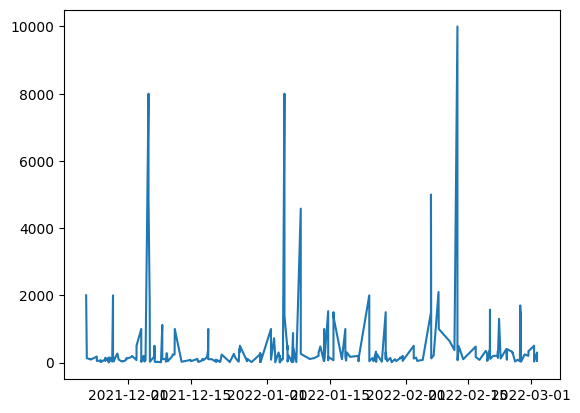

In [74]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(expense_df['Date'], expense_df['INR'])

### Grouping by Day Name and Plotting Day-wise chart

In [75]:
expense_df['Day Name'] = expense_df['Date'].dt.day_name()

In [76]:
expense_df.head(2)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Day Name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday


<Axes: xlabel='Day Name'>

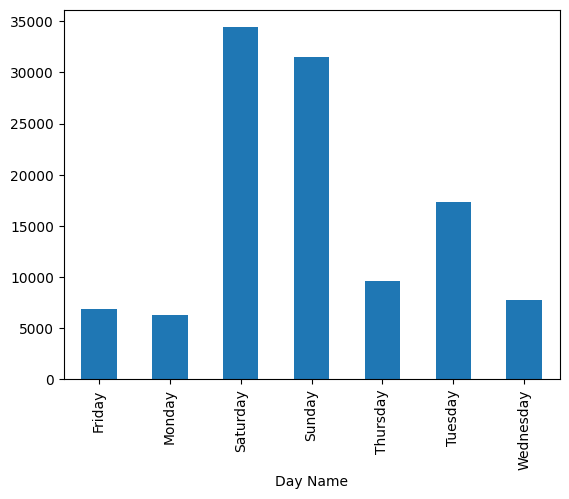

In [83]:
expense_df.groupby('Day Name')["INR"].sum().plot.bar()